<h1> <font size='20px' color='green'>Itroduction</font> to <font size='20px' color='red'> Image Preprocessing </font> </h1>
<br />
<h3> <font size='10px' color='orange'>scikit Image</font> </h3>
<br />
<h3> <font size='10px' color='#660066'>Open CV</font> </h3>

In [33]:
import skimage as si
from skimage import io
from matplotlib import pyplot as plt
import numpy as np
from skimage import transform as tf

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


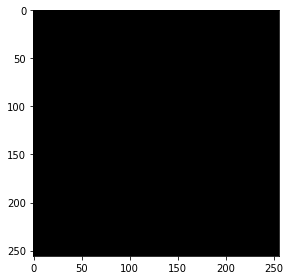

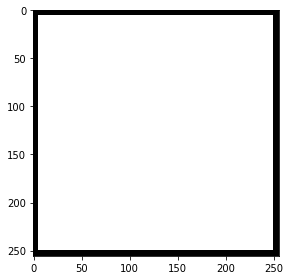

In [34]:
# Image................

i1 = np.zeros([256,256])

io.imshow(i1)

plt.show()

for i in range(5,250):
    for j in range(5,250):
        i1[i,j] = 1;

io.imshow(i1)

plt.show()

In [ ]:
# An example -----

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


Image Shape: (368, 600, 3)


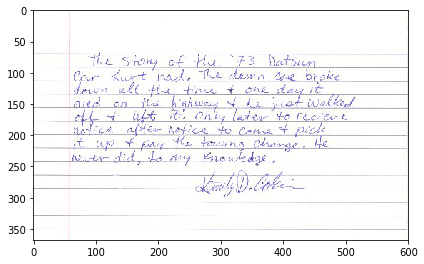

In [38]:
img1 = io.imread('img02.jpg')
io.imshow(img1)
print("Image Shape:",img1.shape)
plt.show()

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


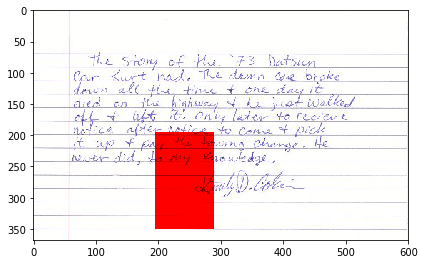

In [39]:
for i in range(195,350):
    for j in range(195,290):
        img1[i,j,1]=0
        img1[i,j,2]=0
        
io.imshow(img1)

plt.show()

# <font color='red'> ------------------Smoothening------------------</font>

In [ ]:
mask = [[0,1,0],
        [1,4,1],
        [0,1,0]   
]

mask1 = np.array(mask)

mask1

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


(2000, 2000, 4)


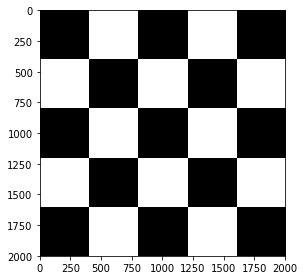

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Image Shape: (300, 300)


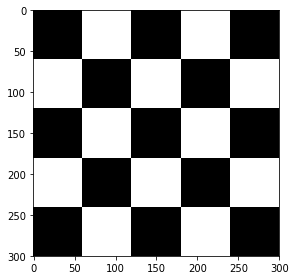

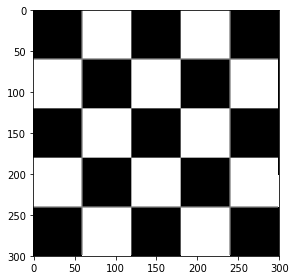

In [40]:


img3 = io.imread('sharp.png')
io.imshow(img3)
print(img3.shape)
plt.show()

x,y=300,300
img3 = si.color.rgb2gray(img3)
p = tf.resize(img3,(x,y))
print("Image Shape:",p.shape)
io.imshow(p)
plt.show()

p_mean = np.empty((x,y))

for i in range(x-1): # why x-1 and y-1
    for j in range(y-1):
        p_mean[i,j]= np.mean([p[i-1,j-1],p[i-1,j],p[i-1,j+1],p[i,j-1],p[i,j],p[i,j+1],p[i+1,j-1],p[i+1,j],p[i+1,j+1]])

io.imshow(p_mean)
plt.show()

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


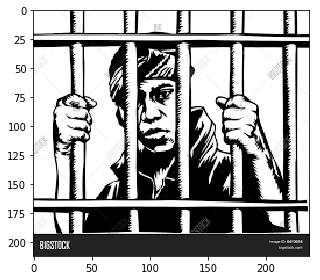

(212, 238)

In [41]:
mbd3 = io.imread('e1.png')

io.imshow(mbd3)

plt.show()

mbd3.shape

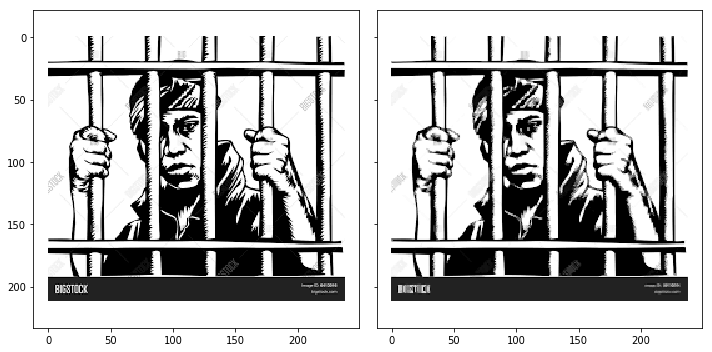

In [42]:
from skimage.filters.rank import median
from skimage.morphology import disk

output = median(mbd3,disk(1)) # print disk............and check

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(mbd3,cmap=plt.cm.gray)
ax[1].imshow(output,cmap=plt.cm.gray)    

plt.tight_layout()
plt.show()

# <font color='green'>-----------Image sharpening----------</font>

In [ ]:
brain = io.imread('blur.jpg')

io.imshow(brain)

plt.show()

brain = si.color.rgb2gray(brain )

brain.shape

In [ ]:

p_laplac = si.filters.laplace(brain,3)

p_added_laplac = p_laplac + brain

io.imshow(abs(p_laplac),cmap=plt.cm.gray)
plt.show()


In [ ]:
io.imshow(abs(p_added_laplac),cmap=plt.cm.gray)
plt.show()

# <font color='yellow' >-----------------Dilation-------------- </font>

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


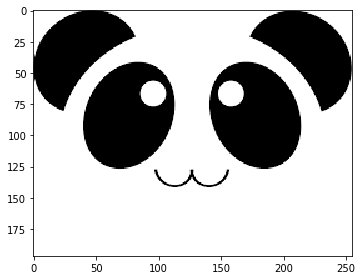

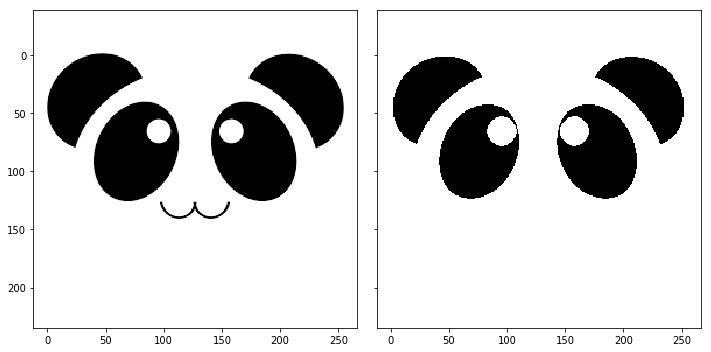

In [43]:
from skimage.morphology import binary_dilation

img4 = io.imread('panda2.png')
img4 = si.color.rgb2gray(img4)
io.imshow(img4)

plt.show()

morph = [[0,0,0],[0,0,0],[0,0,0]]

dilated = binary_dilation(img4,disk(2)) #use morph also--------------------

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(img4,cmap=plt.cm.gray)
ax[1].imshow(dilated,cmap=plt.cm.gray)    

plt.tight_layout()
plt.show()

# <font color='blue'> -----------------Erosion ----------------</font>

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


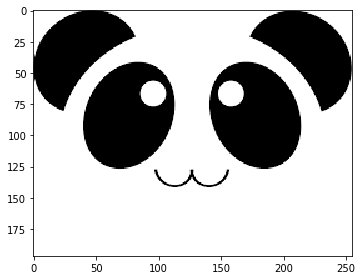

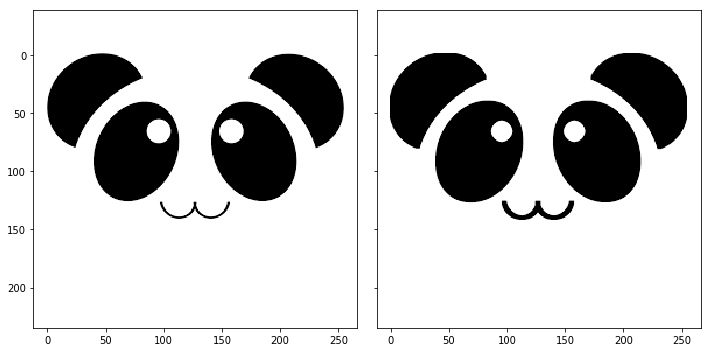

In [44]:


from skimage.morphology import erosion

img5 = io.imread('panda2.png')
img5 = si.color.rgb2gray(img5)
io.imshow(img5)


plt.show()

morph = [[1,1,1],[1,1,1],[1,1,1]]

eroded = erosion(img5, morph) # use disk also---------------

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(img5,cmap=plt.cm.gray)
ax[1].imshow(eroded ,cmap=plt.cm.gray)    

plt.tight_layout()
plt.show()

In [45]:
x,y = img5.shape
new = np.zeros([x,y])
for i in range(x):
    for j in range(y):
        if img5[i,j] == 0:
            new[i,j] = 1        



C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


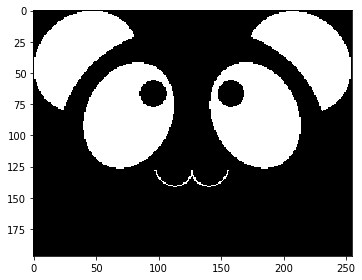

In [46]:
io.imshow(new)
plt.show()

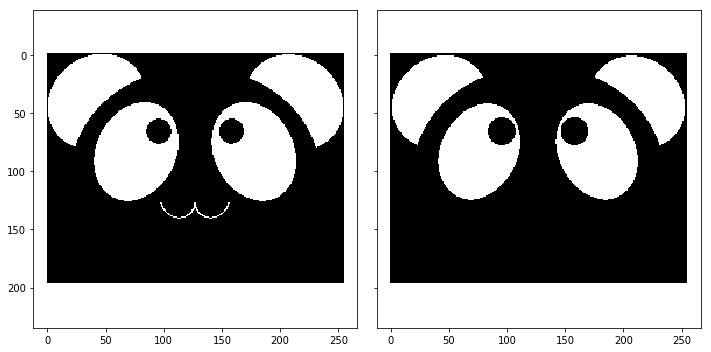

In [47]:


morph = [[1,1,1],[1,1,1],[1,1,1]]

eroded = erosion(new, morph) # use disk also---------------

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(new,cmap=plt.cm.gray)
ax[1].imshow(eroded ,cmap=plt.cm.gray)    

plt.tight_layout()
plt.show()

# <font color='green'>------------- Erosion by reversal--------------</font>

In [48]:

new2 = np.zeros([x,y])
for i in range(x):
    for j in range(y):
        if new[i,j] == 0:
            new2[i,j] = 1 

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


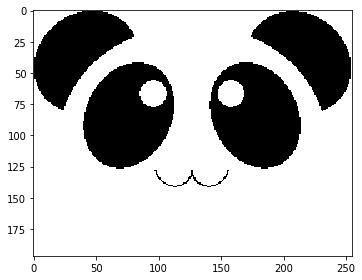

In [49]:
io.imshow(new2)
plt.show()

In [ ]:
from skimage.morphology import erosion

img5 = io.imread('panda2.png')
img5 = si.color.rgb2gray(img5)
io.imshow(img5)

plt.show()

morph = [[1,1,1],[1,1,1],[1,1,1]]

eroded = erosion(img5, morph) # use disk also---------------

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(img5,cmap=plt.cm.gray)
ax[1].imshow(eroded ,cmap=plt.cm.gray)    

plt.tight_layout()
plt.show()

# <font color='red'> -------------Opening-------------------- </font>

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


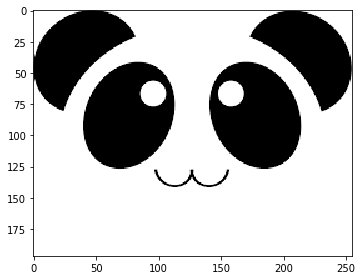

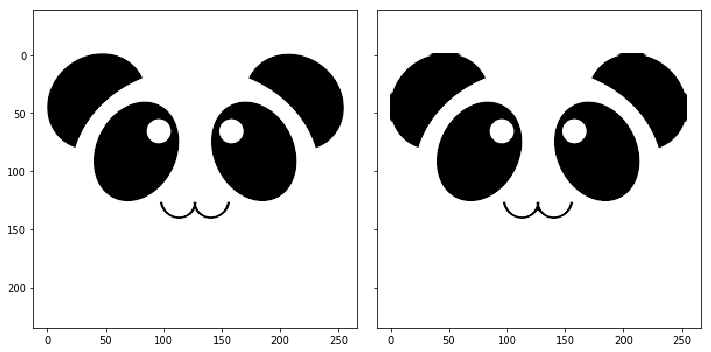

In [50]:
from skimage.morphology import opening

img6 = io.imread('panda2.png')
img6 = si.color.rgb2gray(img6)
io.imshow(img6)

plt.show()

morph = [[1,1,1],[1,1,1],[1,1,1]]

opened = opening(img6, disk(2)) # use disk also---------------

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(img6,cmap=plt.cm.gray)
ax[1].imshow(opened ,cmap=plt.cm.gray)    

plt.tight_layout()
plt.show()

# -------Closing-----------------------

C:\Users\sawan\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


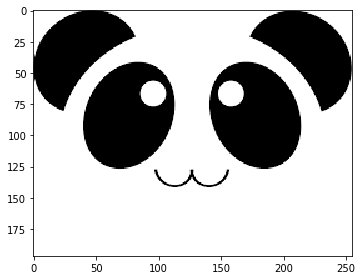

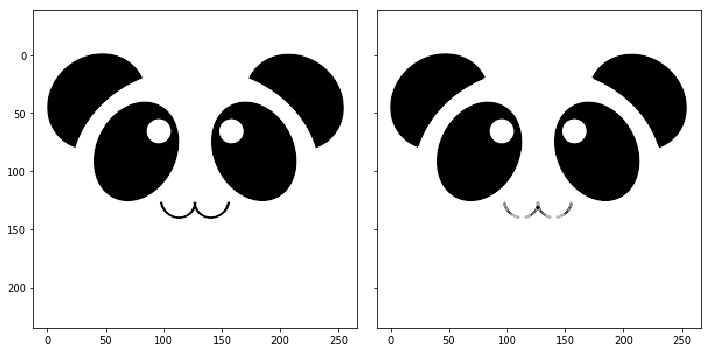

In [51]:
from skimage.morphology import closing

img7 = io.imread('panda2.png')
img7 = si.color.rgb2gray(img7)
io.imshow(img7)

plt.show()

morph = [[1,1,1],[1,1,1],[1,1,1]]

closed = closing(img7, disk(1)) # use disk also---------------

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(img7,cmap=plt.cm.gray)
ax[1].imshow(closed ,cmap=plt.cm.gray)    

plt.tight_layout()
plt.show()

# --------------exercise----------------

# 01.1 Draw 'F' as an image.(do not load an image of F)

# 01.2 Draw a blank chess board

# 01.3 take any rgb image. and show in 9 blocks as follows:
##      [[Red block][Green Block][Blue Block]]
##      [[Green block][Blue Block][Red Block]]
##      [[Blue block][Red Block][Green Block]]

# 02. I have one letter as an image(img03.jpg) form. I am not able to read it. provide more clear picture of letter, using appropriate operations.

# 03. Image (img03.jpg) contains too many dots, which makes the picture very noisey. Clean the image without loosing coins.

# 04. Update the side face detection code to detect left-facing also.

# 05. Drowsiness detection Demo:

#### https://www.pyimagesearch.com/2017/05/08/drowsiness-detection-opencv/